##**1. 라이브러리, 데이터 불러오기**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
path = '/content/drive/Shareddrives/방세 1팀/data'
os.chdir(path)

In [3]:
train = pd.read_csv('train.csv')

##**2. EDA**

**1) 데이터 구조 확인**


In [7]:
train.info

<bound method DataFrame.info of              V0        V1        V2  ...      V254  magic  target
0     -0.547192  1.484333  0.224401  ... -0.760417     21       1
1      0.368786 -0.677230  2.769667  ... -1.007870      3       1
2     -1.319828  2.328226 -0.504360  ... -0.913149     17       0
3      0.917157 -0.281949 -0.183404  ... -1.186311      9       0
4     -1.424237  1.215292  0.875362  ...  0.147275     24       0
...         ...       ...       ...  ...       ...    ...     ...
49147 -7.411628  1.749334 -0.728476  ... -1.640201      1       1
49148  0.945440  0.351402 -0.658693  ... -0.372045     19       0
49149 -0.799171 -6.178023 -0.416882  ... -2.067275      6       0
49150 -1.239661 -0.696473 -0.148699  ...  1.345454     29       0
49151 -0.227362 -2.243140 -1.103132  ... -0.565914     12       1

[49152 rows x 257 columns]>



*   Rows : 49152, Columns: 257
*   데이터가 모두 수치형으로 구성되어 있음




**2) 변수 별 결측치 확인**

In [ ]:
#모든 변수 내에 결측치가 존재하지 않음을 확인하였습니다. 
train.isnull().sum()

V0        0
V1        0
V2        0
V3        0
V4        0
         ..
V252      0
V253      0
V254      0
magic     0
target    0
Length: 257, dtype: int64

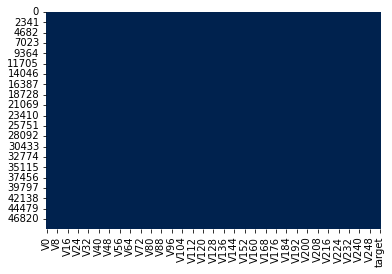

In [ ]:
#변수 별 결측치 시각화
#결측치가 존재한다면 해당 구역에 검은색 이외의 색으로 표시가 되지만, 모두 검은색으로 표시된 것을 보아 결측치가 존재하지 않음을 다시 한번 확인하였습니다. 
%matplotlib inline
sns.heatmap(train.isnull(),cbar=False)

**3) Target Class 비율 확인**

In [ ]:
train['target'].value_counts()

1    24621
0    24531
Name: target, dtype: int64

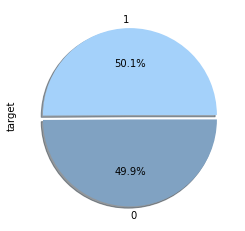

In [ ]:
#Target Class 비율 시각화 
#Target Class 간에 균형을 이루고 있음을 확인하였습니다. 
train['target'].value_counts().plot.pie(
    explode = [0,0.05],autopct = '%1.1f%%',shadow=True,
    colors = ['#A4D1FA','#80A2C2'])

**4) Train 변수 별 고유값 개수 확인**

In [ ]:
train.drop('target',axis=1).nunique()

V0       49152
V1       49152
V2       49152
V3       49152
V4       49152
         ...  
V251     49152
V252     49152
V253     49152
V254     49152
magic       32
Length: 256, dtype: int64

In [ ]:
# 'magic'변수를 제외한 나머지 변수들은 모두 49152개의 고유값을 지니고 있음을 확인하였습니다.
pd.DataFrame(train.drop('target',axis=1).nunique().value_counts(),columns=['count']) 

,count
49152,255
32,1


**4-1) 'Magic'변수의 수치별 data 수 확인**

In [ ]:
# 변수 'Magic'은 0~31까지, 32개의 정수 값을 지니며, 각 정수 값에 속하는 데이터의 수가 모두 동일함을 확인하였습니다..
train['magic'].value_counts().sort_index()

0     1536
1     1536
2     1536
3     1536
4     1536
5     1536
6     1536
7     1536
8     1536
9     1536
10    1536
11    1536
12    1536
13    1536
14    1536
15    1536
16    1536
17    1536
18    1536
19    1536
20    1536
21    1536
22    1536
23    1536
24    1536
25    1536
26    1536
27    1536
28    1536
29    1536
30    1536
31    1536
Name: magic, dtype: int64

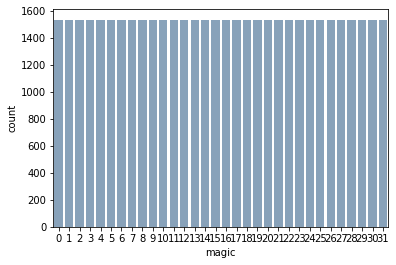

In [ ]:
sns.countplot(train['magic'],color='#80A2C2')

**5) Train 변수 별 분포 ('Magic'변수 제외)**

In [9]:
cols = train.columns.difference(['magic','target']).tolist()

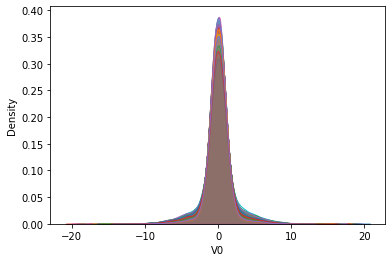

In [ ]:
#'Magic'변수를 제외한 이유는 magic값에 따라 동일한 크기의 데이터가 할당되어 있기에 균일분포를 따를 것이라고 판단했기 때문입니다.
# 해당 시각화를 통해 모든 변수가 유사한 분포를 띄고 있음을 확인하였습니다. 
for i, col_name in enumerate(cols):
  sns.kdeplot(train[col_name],shade=True)

In [ ]:
#각 변수별 평균과 분산
stat = pd.DataFrame(columns=['mean','var'])
for i, col_name in enumerate(cols) :
  stat = stat.append({'mean': train[col_name].mean(),'var' : train[col_name].var()},ignore_index=True)

Text(0, 0.5, 'Variance')

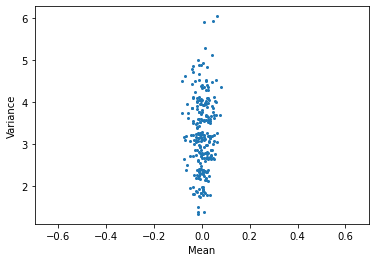

In [ ]:
#각 변수별 평균은 대부분 0에 근접한 수치를 지니고 있지만
#변수간 분산의 차이는 크다는 사실을 발견할 수 있었고, 이후 변수 선택을 위해 변수별 분산의 이질성을 활용할 수 있다고 생각하였습니다.  
plt.plot('mean','var',data=stat,
         linestyle='none',
         marker='o',
         markersize=2)
plt.xlim([-0.7,0.7])
plt.xlabel('Mean')
plt.ylabel('Variance')

**6) 변수 간 상관관계**

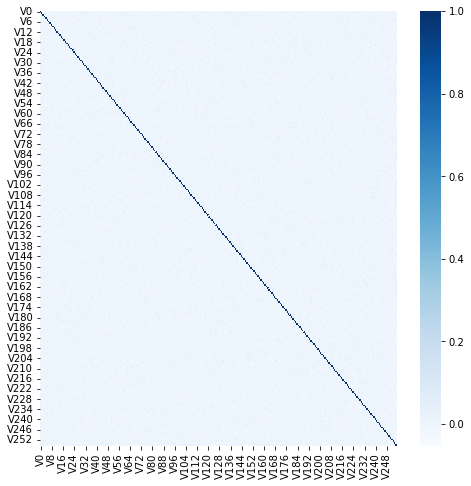

In [ ]:
# 시각화를 통해 모든 변수 간 상관관계가 0.2이하임을 확인할 수 있었습니다. 
# 이를 통해 PCA와 같은 차원축소는 적용하기 어렵다고 판단하였습니다. 
plt.figure(figsize = (8,8))
sns.heatmap(train.drop('target',axis=1).corr(),annot=False,
            cmap='Blues')